# Testing DRFL algorithm

The purpose of this paper consists on testing about how is working the implemented algorithm.

This algorithm works with time series, taking as input a pd.Series data


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from main import DRFL
import random


# Creating and Visualizing Easy Time-Series

Let's create a time series for detecting two target routines. Each routine will have a noise parameter (to give more realism) 

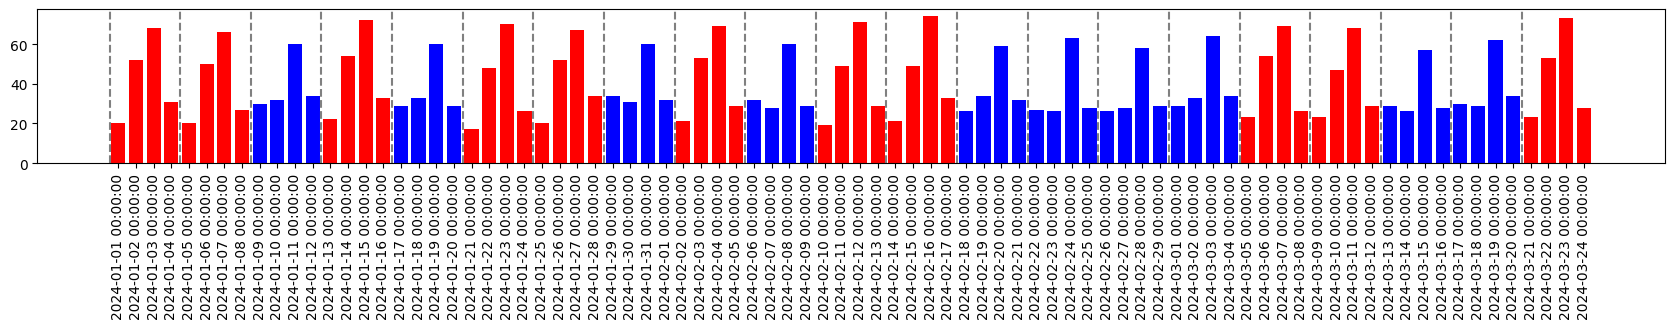

In [66]:
# PARAMS
target_routine_1 = [20, 50, 70, 30]
target_routine_2 = [30, 30, 60, 30]
noise_threshold_minutes = 4
T_max = 21
idx_routine1 = [0,1,3,5,6,8,10,11,16,17,20]

def randomized_routine(routine, noise_threshold):
    return [random.randint(x-noise_threshold, x+noise_threshold) for x in routine]

def get_colors(idx_routine):
    colores = []
    for x in range(T_max):
        if x in idx_routine:
            for y in range(len(target_routine_1)):
                colores.append("red")
        else:
            for y in range(len(target_routine_1)):
                colores.append("blue")
    return colores


time_series = []
for x in range(T_max):
    if x in idx_routine1:
        random_1 = randomized_routine(target_routine_1, noise_threshold_minutes)
        for y in random_1:
            time_series.append(y)
    else:
        random_2 = randomized_routine(target_routine_2, noise_threshold_minutes)
        for y in random_2:
            time_series.append(y)
            
time_series = np.array(time_series)

# Plotting the bar chart with vertical lines every 4 bars
plt.figure(figsize=(T_max,2))
bars = plt.bar(x=[x for x in range(len(time_series))], height=time_series, color=get_colors(idx_routine1))

# Draw a vertical line every four bars
for i in range(0, len(time_series), len(target_routine_1)):
    plt.axvline(x=i-0.5, color='grey', linestyle='--')
plt.xticks(ticks=[x for x in range(len(time_series))], labels=pd.date_range(start="2024-01-01", periods=len(time_series)),
           rotation=90)
plt.show()

Reds owns to the routine target 1, and blues owns to routine target 2

In [67]:
time_series = pd.DataFrame(
    {
        "Date": pd.date_range(start="2024-01-01", periods=len(time_series)),
        "Time-Series": time_series
    }
).set_index("Date")["Time-Series"]

Now that we have synthetised data, lets detect the routines with DRFL algorithm:

We'll use as fixed param: 
m = 4


In [70]:
routine_detector = DRFL(m=4, R=5, C=5, G=50, epsilon=1)
routine_detector.fit(time_series)
routine_detector.show_results()

Routines detected:  5
__________________________________________________
Centroid 1: [20.6 50.8 69.4 29.7]
Routine 1: [array([20, 52, 68, 31]), array([20, 50, 66, 27]), array([22, 54, 72, 33]), array([17, 48, 70, 26]), array([20, 52, 67, 34]), array([21, 53, 69, 29]), array([19, 49, 71, 29]), array([21, 49, 74, 33]), array([23, 54, 69, 26]), array([23, 47, 68, 29])]
Date 1: [Timestamp('2024-01-01 00:00:00'), Timestamp('2024-01-05 00:00:00'), Timestamp('2024-01-13 00:00:00'), Timestamp('2024-01-21 00:00:00'), Timestamp('2024-01-25 00:00:00'), Timestamp('2024-02-02 00:00:00'), Timestamp('2024-02-10 00:00:00'), Timestamp('2024-02-14 00:00:00'), Timestamp('2024-03-05 00:00:00'), Timestamp('2024-03-09 00:00:00')]

 -------------------------------------------------- 

Centroid 2: [29.         28.83333333 29.5        59.33333333]
Routine 2: [array([27, 30, 32, 60]), array([29, 32, 28, 60]), array([33, 26, 34, 59]), array([28, 26, 28, 58]), array([29, 29, 26, 57]), array([28, 30, 29, 62])]
Dat

We see overlapping, so let's reduce the epsilon param to 0.5

In [72]:
routine_detector = DRFL(m=4, R=5, C=5, G=50, epsilon=0.5)
routine_detector.fit(time_series)
routine_detector.show_results()
routines_detected = routine_detector.get_results()

Routines detected:  2
__________________________________________________
Centroid 1: [20.6 50.8 69.4 29.7]
Routine 1: [array([20, 52, 68, 31]), array([20, 50, 66, 27]), array([22, 54, 72, 33]), array([17, 48, 70, 26]), array([20, 52, 67, 34]), array([21, 53, 69, 29]), array([19, 49, 71, 29]), array([21, 49, 74, 33]), array([23, 54, 69, 26]), array([23, 47, 68, 29])]
Date 1: [Timestamp('2024-01-01 00:00:00'), Timestamp('2024-01-05 00:00:00'), Timestamp('2024-01-13 00:00:00'), Timestamp('2024-01-21 00:00:00'), Timestamp('2024-01-25 00:00:00'), Timestamp('2024-02-02 00:00:00'), Timestamp('2024-02-10 00:00:00'), Timestamp('2024-02-14 00:00:00'), Timestamp('2024-03-05 00:00:00'), Timestamp('2024-03-09 00:00:00')]

 -------------------------------------------------- 

Centroid 2: [29.55555556 29.55555556 60.44444444 30.77777778]
Routine 2: [array([30, 32, 60, 34]), array([29, 33, 60, 29]), array([34, 31, 60, 32]), array([32, 28, 60, 29]), array([27, 26, 63, 28]), array([26, 28, 58, 29]), arr

In [73]:
routines_detected

[{'Cent': array([20.6, 50.8, 69.4, 29.7]),
  'Inst': [array([20, 52, 68, 31]),
   array([20, 50, 66, 27]),
   array([22, 54, 72, 33]),
   array([17, 48, 70, 26]),
   array([20, 52, 67, 34]),
   array([21, 53, 69, 29]),
   array([19, 49, 71, 29]),
   array([21, 49, 74, 33]),
   array([23, 54, 69, 26]),
   array([23, 47, 68, 29])],
  'Date': [Timestamp('2024-01-01 00:00:00'),
   Timestamp('2024-01-05 00:00:00'),
   Timestamp('2024-01-13 00:00:00'),
   Timestamp('2024-01-21 00:00:00'),
   Timestamp('2024-01-25 00:00:00'),
   Timestamp('2024-02-02 00:00:00'),
   Timestamp('2024-02-10 00:00:00'),
   Timestamp('2024-02-14 00:00:00'),
   Timestamp('2024-03-05 00:00:00'),
   Timestamp('2024-03-09 00:00:00')],
  'auxIndex': [0, 4, 12, 20, 24, 32, 40, 44, 64, 68]},
 {'Cent': array([29.55555556, 29.55555556, 60.44444444, 30.77777778]),
  'Inst': [array([30, 32, 60, 34]),
   array([29, 33, 60, 29]),
   array([34, 31, 60, 32]),
   array([32, 28, 60, 29]),
   array([27, 26, 63, 28]),
   array([26, 2